In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
df = pd.read_csv("./FringeZernike_2D-s1.csv", index_col=0, header=None).T

In [3]:
df

,xan,yan,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
1,-0.247,0.247,0.0786,0.0285,-0.0285,0.0785,0.0000,-0.1684,0.0143,-0.0143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.247,0.223,0.0620,0.0285,-0.0256,0.0619,0.0160,-0.1515,0.0143,-0.0129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.247,0.198,0.0490,0.0284,-0.0227,0.0489,0.0303,-0.1347,0.0143,-0.0114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.247,0.173,0.0394,0.0284,-0.0199,0.0394,0.0429,-0.1179,0.0143,-0.0100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.247,0.148,0.0335,0.0284,-0.0170,0.0334,0.0539,-0.1010,0.0143,-0.0086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.247,-0.148,0.0335,-0.0284,0.0170,0.0334,0.0539,-0.1010,-0.0143,0.0086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.247,-0.173,0.0394,-0.0284,0.0199,0.0394,0.0429,-0.1179,-0.0143,0.0100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.247,-0.198,0.0490,-0.0284,0.0227,0.0489,0.0303,-0.1347,-0.0143,0.0114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,0.247,-0.223,0.0620,-0.0285,0.0256,0.0619,0.0160,-0.1515,-0.0143,0.0129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


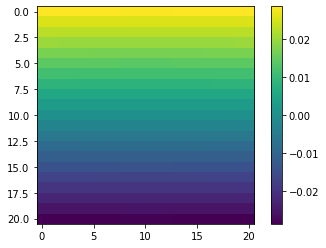

In [4]:
plt.imshow(np.reshape(np.array(df['2']),(21,21)))
plt.colorbar()

In [5]:
# values from the table on wiki.
pixel_size = 10e-6 # m
pixel_scale = 424. # mas/pix

# values derived from the above values.
plate_scale = pixel_scale*1.e-3/3600./pixel_size # deg/m
efl = pixel_size/(pixel_scale*1.e-3/3600.*np.pi/180.) # m

# constants.
ref_wl = 1.3e-6 # m
r_prim = 0.2 # m

# Fringe ID 2 -> Z=rho_x = (x/R) -> WFE_tip = c2 wl_ref (x/R) -> theta_x = atan(c2 wl_ref/R) -> dx = efl * theta_x 
# Fringe ID 3 -> Z=rho_y = (y/R) -> theta_y = c3 wl_ref (y/R) -> theta_y = atan(c3 wl_ref/R) -> dy = efl * theta_y
# assuming that CodeV Zernike does not use the normalization coefficients for the Zernike polynomials.

theta_x = np.arctan(np.array(df['2'])*ref_wl/r_prim)
theta_y = np.arctan(np.array(df['3'])*ref_wl/r_prim)
dx = efl*theta_x
dy = efl*theta_y

In [6]:
X = np.reshape(np.array(df['xan']), (21, 21))
Y = np.reshape(np.array(df['yan']), (21, 21))
U = np.reshape(dx, (21, 21))
V = np.reshape(dy, (21, 21))

Text(0, 0.5, 'Y (deg)')

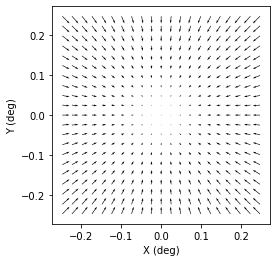

In [7]:
g = plt.subplot()
g.set_aspect('equal')
plt.quiver(X, Y, U, V)
plt.xlabel('X (deg)')
plt.ylabel('Y (deg)')

In [8]:
np.sqrt(dx*dx+dy*dy)/pixel_size

array([0.12744784, 0.12113732, 0.11496449, 0.10965484, 0.10466241,
       0.10012011, 0.09635678, 0.09343607, 0.09091182, 0.08960908,
       0.0888544 , 0.08960908, 0.09091182, 0.09343607, 0.09635678,
       0.10012011, 0.10466241, 0.10965484, 0.11496449, 0.12113732,
       0.12744784, 0.12113732, 0.11447947, 0.10818976, 0.10228041,
       0.0969088 , 0.09229207, 0.08790635, 0.08469472, 0.08224565,
       0.08048903, 0.08000058, 0.08048903, 0.08224565, 0.08469472,
       0.08790635, 0.09229207, 0.0969088 , 0.10228041, 0.10818976,
       0.11447947, 0.12113732, 0.11496449, 0.10818976, 0.10151109,
       0.09524787, 0.08942367, 0.08423067, 0.07989803, 0.07635028,
       0.07331727, 0.07169555, 0.07114676, 0.07169555, 0.07331727,
       0.07635028, 0.07989803, 0.08423067, 0.08942367, 0.09524787,
       0.10151109, 0.10818976, 0.11496449, 0.10965484, 0.10228041,
       0.09524787, 0.08854271, 0.08251995, 0.07686192, 0.0718133 ,
       0.06784409, 0.06476088, 0.062919  , 0.06197674, 0.06291

In [12]:
from jis.photonsim.wfe import read_FringeZernike37

In [15]:
f = read_FringeZernike37("./FringeZernike_2D-s1.csv", 1.3e-6)

In [83]:
c2 = []
c3 = []
for i in range(1,442):
    c2.append(f[2](df['xan'][i], df['yan'][i]))
    c3.append(f[3](df['xan'][i], df['yan'][i]))
c2 = np.array(c2).flatten()
c3 = np.array(c3).flatten()

theta_x2 = np.arctan(c2/r_prim)
theta_y2 = np.arctan(c3/r_prim)
dx2 = efl*theta_x2
dy2 = efl*theta_y2

In [84]:
X2 = np.reshape(np.array(df['xan']), (21, 21))
Y2 = np.reshape(np.array(df['yan']), (21, 21))
U2 = np.reshape(dx2, (21, 21))
V2 = np.reshape(dy2, (21, 21))

Text(0, 0.5, 'Y (deg)')

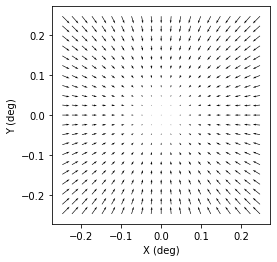

In [85]:
g = plt.subplot()
g.set_aspect('equal')
plt.quiver(X2, Y2, U2, V2)
plt.xlabel('X (deg)')
plt.ylabel('Y (deg)')

In [98]:
n=51
xan, yan = (np.indices((n,n))-(n-1)/2)*0.245/((n-1)/2)
xan = xan.flatten()
yan = yan.flatten()

In [99]:
c2_2 = []
c3_2 = []
for i in range(0, np.size(xan)):
    c2_2.append(f[2](xan[i], yan[i]))
    c3_2.append(f[3](xan[i], yan[i]))
c2_2 = np.array(c2_2).flatten()
c3_2 = np.array(c3_2).flatten()

theta_x3 = np.arctan(c2_2/r_prim)
theta_y3 = np.arctan(c3_2/r_prim)
dx3 = efl*theta_x3
dy3 = efl*theta_y3

In [100]:
X3 = np.reshape(xan, (n, n))
Y3 = np.reshape(yan, (n, n))
U3 = np.reshape(dx3, (n, n))
V3 = np.reshape(dy3, (n, n))

Text(0, 0.5, 'Y (deg)')

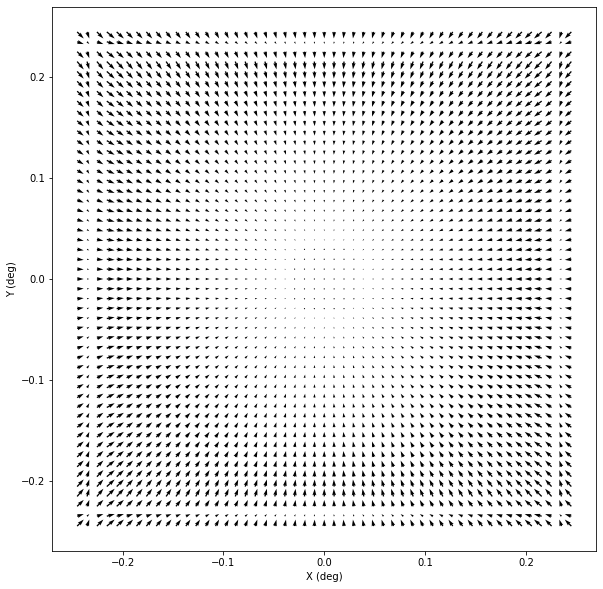

In [104]:
fig = plt.figure(figsize=(10,10))
g = plt.subplot()
g.set_aspect('equal')
plt.quiver(X3, Y3, U3, V3)
plt.xlabel('X (deg)')
plt.ylabel('Y (deg)')